In [2]:
import pandas as pd
file_path = "API_SP.POP.TOTL_DS2_en_excel_v2_38348.xls"
xls = pd.ExcelFile(file_path)
print(xls.sheet_names)

['Data', 'Metadata - Countries', 'Metadata - Indicators']


In [8]:
import pandas as pd
file_path = "API_SP.POP.TOTL_DS2_en_excel_v2_38348.xls"
df = pd.read_excel(file_path, sheet_name='Data', skiprows=3)
print(df.head())

                  Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

          1960         1961         1962         1963         1964  \
0      54922.0      55578.0      56320.0      57002.0      57619.0   
1  130075728.0  133534923.0  137171659.0  140945536.0  144904094.0   
2    9035043.0    9214083.0    9404406.0    9604487.0    9814318.0   
3   97630925.0   99706674.0  101854756.0  104089175.0  106388440.0   
4    5231654.0    5301583.0    5354310.0    5408320.0    5464187.0   

          1965         1966         1967         1968         1969  \
0      58190.0      58

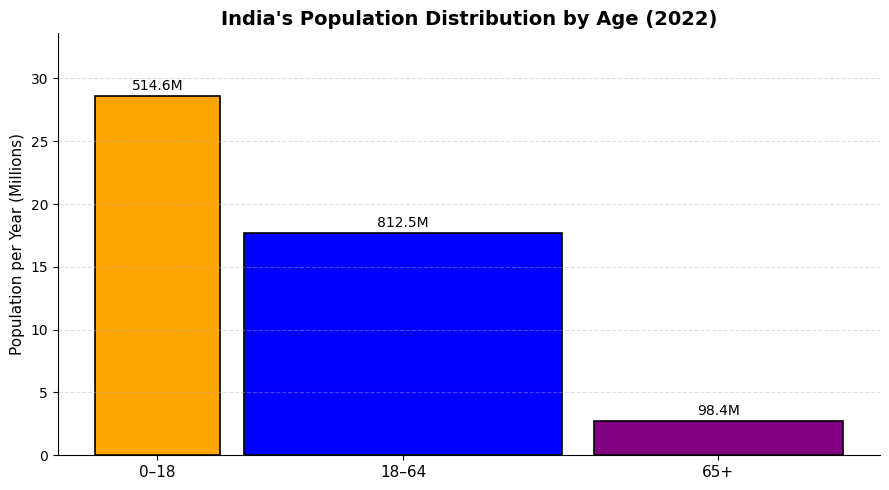

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "API_SP.POP.TOTL_DS2_en_excel_v2_38348.xls"
df = pd.read_excel(file_path, sheet_name='Data', skiprows=3)

india = df[(df['Country Name'] == 'India') & (df['Indicator Name'] == 'Population, total')]
population_2022 = india['2022'].values[0]

age_ranges = [(0, 18), (18, 64), (64, 100)]
percentages = [36.1, 57.0, 6.9]
colors = ['orange', 'blue', 'purple']
labels = ['0–18', '18–64', '65+']

plt.figure(figsize=(9, 5))
ax = plt.gca()

for (start, end), percent, color, label in zip(age_ranges, percentages, colors, labels):
    pop_million = (population_2022 * percent / 100) / 1_000_000
    width = end - start
    height = pop_million / width
    center = start + width / 2
    ax.bar(center, height, width=width * 0.9, color=color, edgecolor='black', linewidth=1.2)
    ax.text(center, height + 0.5, f"{pop_million:.1f}M", ha='center', fontsize=10)

ax.set_xticks([9, 41, 82])
ax.set_xticklabels(labels, fontsize=11)
ax.set_title("India's Population Distribution by Age (2022)", fontsize=14, weight='bold')
ax.set_ylabel("Population per Year (Millions)", fontsize=11)
ax.set_ylim(0, max((population_2022 * p / 100) / (end - start) / 1_000_000 for (start, end), p in zip(age_ranges, percentages)) + 5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


In [26]:
plt.savefig("India_Age_Distribution_2022.png")

<Figure size 640x480 with 0 Axes>